In [196]:
import numpy as np
import pandas as pd

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
df_train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UoM_ML/Lab01/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UoM_ML/Lab01/test.csv')
df_expected = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UoM_ML/Lab01/expected.csv')


In [200]:
df_train = df_train.fillna(np.nan)
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [201]:
df_test = df_test.fillna(np.nan)
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,0.505150,1.59,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [202]:
df_expected.head()

,y
0,6
1,6
2,7
3,6
4,6


# Preprocessing

### Filling missing values

<Axes: >

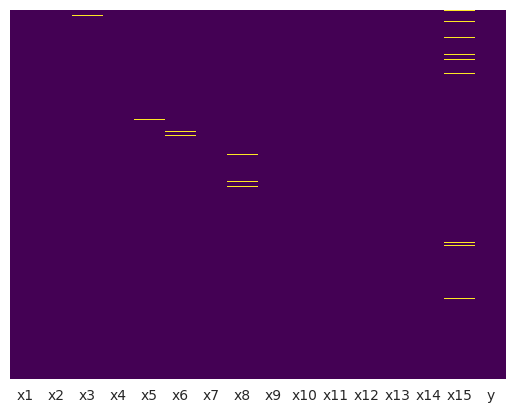

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

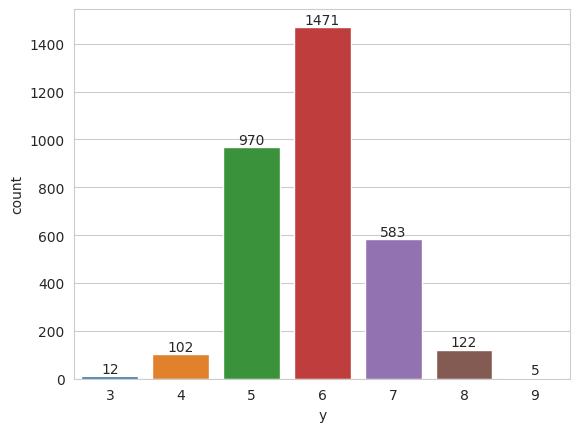

In [204]:
sns.set_style('whitegrid')
cntplot = sns.countplot(x='y',data=df_train)

# Add count labels to the bars
for p in cntplot.patches:
    cntplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

Text(0, 0.5, 'x15')

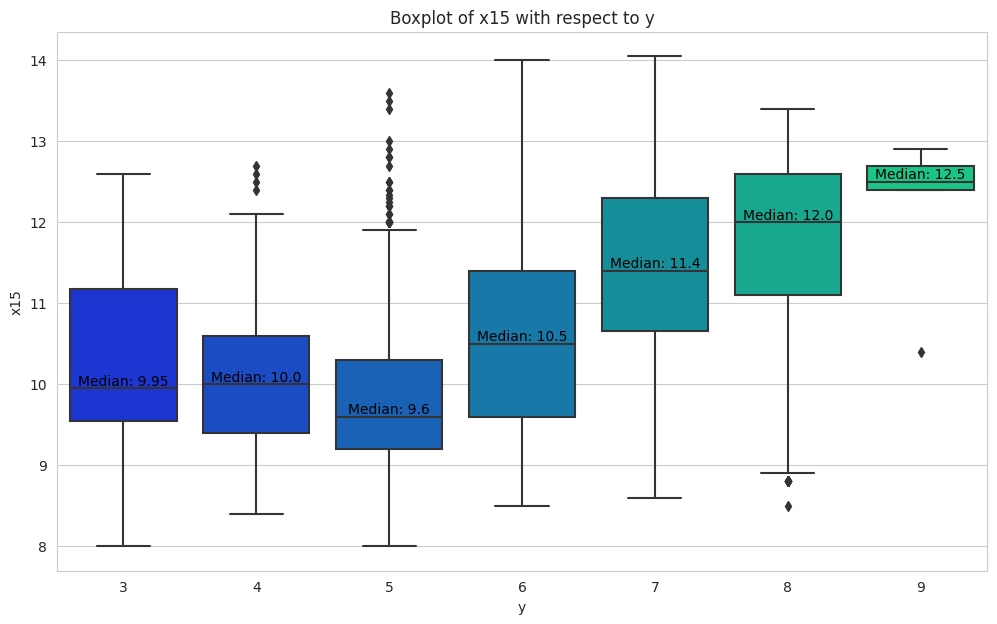

In [205]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='y',y='x15',data=df_train,palette='winter')
# Calculate the median value
median_val = df_train.groupby('y')['x15'].median()

# Add labels to show the median value
for i, median in enumerate(median_val):
    ax.text(i, median, f'Median: {median}', horizontalalignment='center', verticalalignment='bottom', color='black')

# Set the plot title and labels
ax.set_title('Boxplot of x15 with respect to y')
ax.set_xlabel('y')
ax.set_ylabel('x15')

In [206]:
def impute_x15(cols):
    x15 = cols[0]
    y = cols[1]
    
    if pd.isnull(x15):
        if y == 3:
            return 9.95 # median x15 for y=3 by box plot
        elif y == 4:
            return 10.0 # median x15 for y=4 by box plot
        elif y == 5:
            return 9.6 # median x15 for y=5 by box plot
        elif y == 6:
            return 10.5 # median x15 for y=6 by box plot
        elif y == 7:
            return 11.4 # median x15 for y=7 by box plot
        elif y == 8:
            return 12.0 # median x15 for y=8 by box plot
        else:
            return 12.5 # median x15 for y=9 by box plot
    else:
        return x15

In [207]:
df_train['x15'] = df_train[['x15','y']].apply(impute_x15,axis=1)

<Axes: >

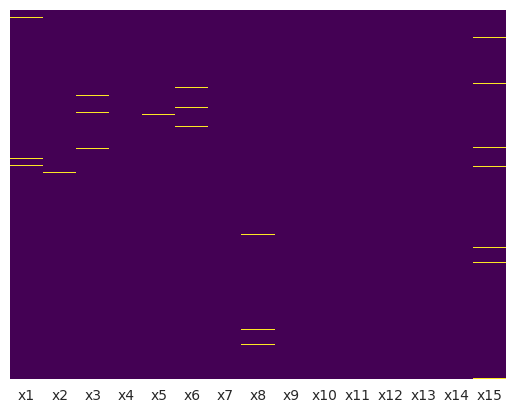

In [208]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'x15')

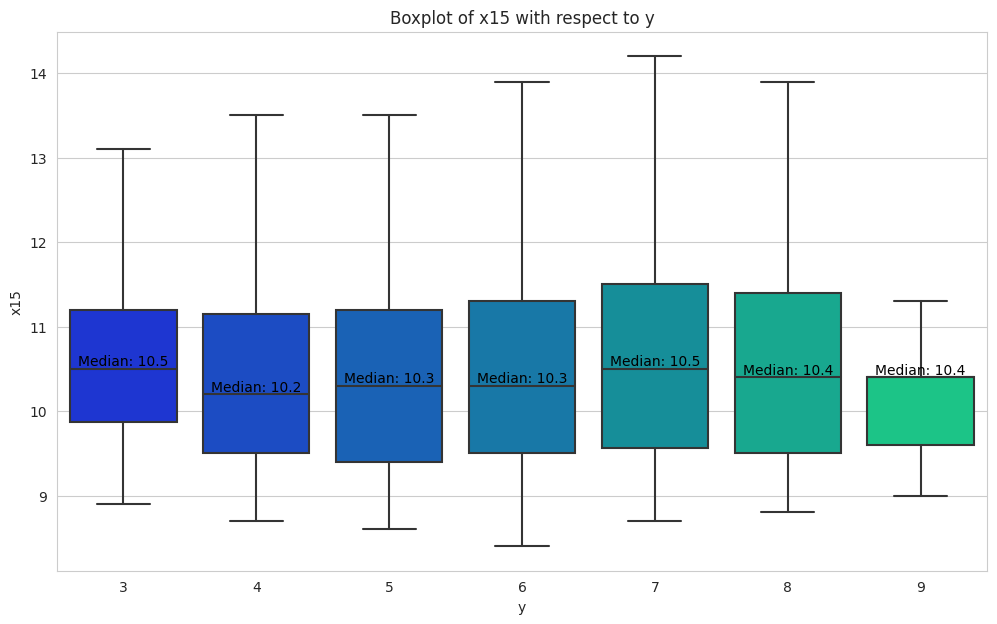

In [209]:
df_test_concatenated = pd.concat([df_test, df_expected], axis=1)

plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='y',y='x15',data=df_test_concatenated,palette='winter')
# Calculate the median value
median_val = df_test_concatenated.groupby('y')['x15'].median()

# Add labels to show the median value
for i, median in enumerate(median_val):
    ax.text(i, median, f'Median: {median}', horizontalalignment='center', verticalalignment='bottom', color='black')

# Set the plot title and labels
ax.set_title('Boxplot of x15 with respect to y')
ax.set_xlabel('y')
ax.set_ylabel('x15')

In [210]:
def impute_x15_test_dataset(cols):
    x15 = cols[0]
    y = cols[1]
    
    if pd.isnull(x15):
        if y == 3:
            return 10.5 # median x15 for y=3 by box plot
        elif y == 4:
            return 10.2 # median x15 for y=4 by box plot
        elif y == 5:
            return 10.3 # median x15 for y=5 by box plot
        elif y == 6:
            return 10.3 # median x15 for y=6 by box plot
        elif y == 7:
            return 10.5 # median x15 for y=7 by box plot
        elif y == 8:
            return 10.4 # median x15 for y=8 by box plot
        else:
            return 10.4 # median x15 for y=9 by box plot
    else:
        return x15

In [211]:
df_test_concatenated['x15'] = df_test_concatenated[['x15','y']].apply(impute_x15_test_dataset,axis=1)

In [212]:
features_to_be_filled = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14']

def fill_nan_by_category_mean(data, categorical_column, nan_columns):
    for column in nan_columns:
        category_means = data.groupby(categorical_column)[column].transform('mean')
        data[column].fillna(category_means, inplace=True)
    return data

# Call the function to fill NaN values by category mean
filled_train_data = fill_nan_by_category_mean(df_train, 'y', features_to_be_filled)

<Axes: >

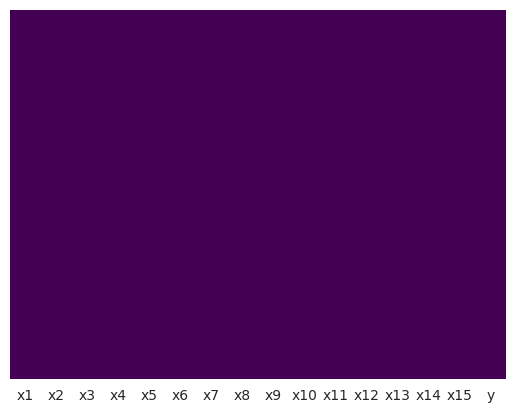

In [213]:
sns.heatmap(filled_train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [214]:
# Call the function to fill NaN values by category mean
filled_test_data = fill_nan_by_category_mean(df_test_concatenated, 'y', features_to_be_filled)

<Axes: >

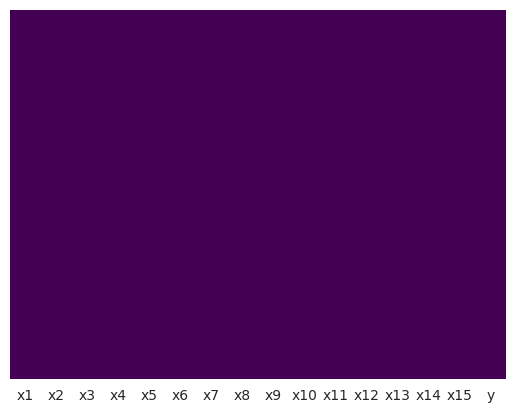

In [215]:
sns.heatmap(filled_test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [216]:
# df1_x = df1.drop(columns=["y"])
# df1_y = df1["y"]

In [217]:
X_train = filled_train_data.drop(columns=["y"])
X_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [218]:
Y_train = filled_train_data["y"]
Y_train.head()

0    6
1    6
2    7
3    6
4    6
Name: y, dtype: int64

In [219]:
# df2_x = df2
# df2_y = df3["y"]

In [220]:
X_test = filled_test_data.drop(columns=["y"])
X_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,0.505150,1.59,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [221]:
Y_test = filled_test_data["y"]
Y_test.head()

0    6
1    6
2    7
3    6
4    6
Name: y, dtype: int64

### Resampling to fix Imbalanced Dataset

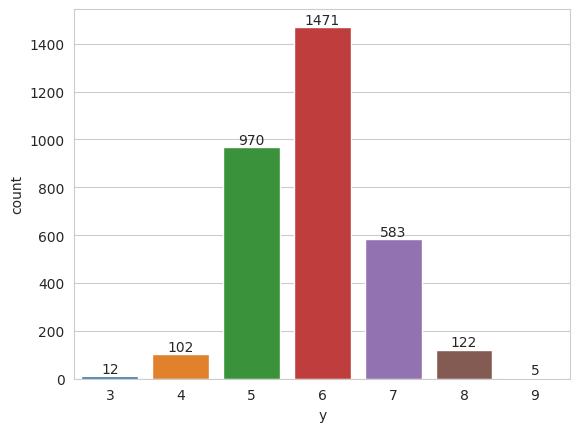

In [222]:
sns.set_style('whitegrid')
cntplot = sns.countplot(x='y',data=filled_train_data)

# Add count labels to the bars
for p in cntplot.patches:
    cntplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

<Axes: >

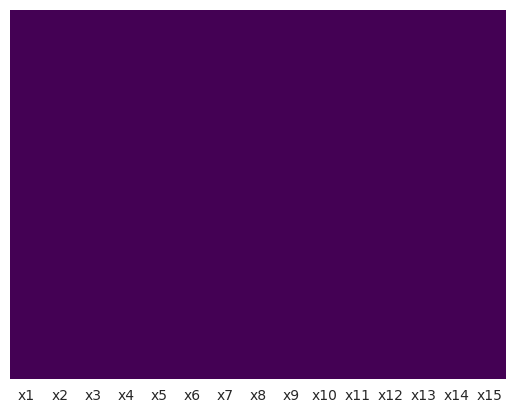

In [223]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [224]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Instantiate the SMOTE
smote = SMOTE(random_state=42, sampling_strategy = {3: 300, 4: 450, 8: 450, 9: 300}, k_neighbors=4)

# Resample the subset of features using SMOTE
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


In [225]:
resampled_trained = pd.concat([X_train_resampled, Y_train_resampled], axis=1)
count = len(resampled_trained[resampled_trained['y'] == 9])
count

300

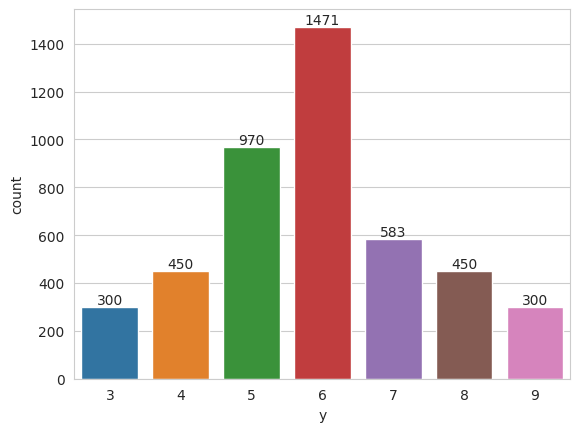

In [226]:
resampled_trained.shape
sns.set_style('whitegrid')
cntplot = sns.countplot(x='y',data=resampled_trained)

# Add count labels to the bars
for p in cntplot.patches:
    cntplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

In [227]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = {5: 800, 6: 800})

# Resample the data
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train_resampled, Y_train_resampled)

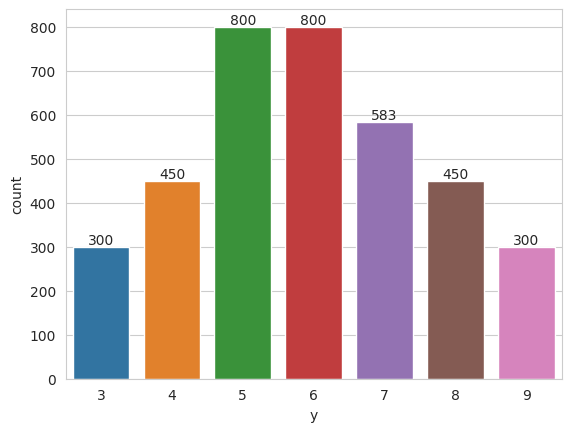

In [228]:
resampled_trained = pd.concat([X_train_resampled, Y_train_resampled], axis=1)
sns.set_style('whitegrid')
cntplot = sns.countplot(x='y',data=resampled_trained)

# Add count labels to the bars
for p in cntplot.patches:
    cntplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the plot
plt.show()

In [229]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_normalized = scaler.fit_transform(X_train) #the scaler is fitted to the training set and then transformed
X_test_normalized = scaler.transform(X_test) 
scaler2 = Normalizer()
X_train_normalized_resampled = scaler2.fit_transform(X_train_resampled) #the scaler is fitted to the training set and then transformed
X_test_normalized_resampled = scaler2.transform(X_test) 

In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)
X_train_pca[:5]

array([[ 5.11133772e-02, -1.60272446e-03, -1.02508043e-03,
        -1.41554966e-03,  1.35783379e-02, -6.09678450e-03,
        -5.83372901e-05, -1.18797563e-03, -2.37829430e-04,
         8.50780783e-04],
       [ 1.27846200e-01,  3.43462238e-02, -2.78337001e-02,
        -8.19937667e-04,  2.20175789e-03,  1.02035801e-04,
         5.80195952e-03,  9.61694060e-04,  1.04610245e-03,
        -2.81177239e-03],
       [ 4.85857433e-02,  4.37431067e-02, -1.84829992e-03,
        -2.03173519e-03, -3.28678437e-03, -7.98381925e-03,
        -8.85184473e-04, -2.32922668e-03, -1.02998911e-03,
        -2.07948717e-04],
       [-8.22023467e-02,  1.99119913e-02, -2.71196727e-02,
        -1.03547813e-04, -6.24801253e-03, -7.67736294e-04,
        -1.11483373e-03,  1.75091191e-03, -6.80760764e-04,
        -4.51882193e-04],
       [ 6.62631233e-02,  5.02346818e-02, -3.62643367e-02,
        -1.62812567e-03, -2.66247478e-03, -6.17800026e-03,
        -2.44474852e-03, -4.16821369e-03, -1.13410047e-03,
        -8.

# Training the Model

### KNN Classifier

In [231]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score


# Instantiate learning model (k = 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_classifier.fit(X_train_normalized_resampled, Y_train_resampled)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test_normalized_resampled)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 26.03 %.


In [232]:
knn_classifier.fit(X_train_normalized, Y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test_normalized)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of the kNN classifier is equal 34.29 %.


In [233]:
knn_classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 34.11 %.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

<Figure size 640x480 with 0 Axes>

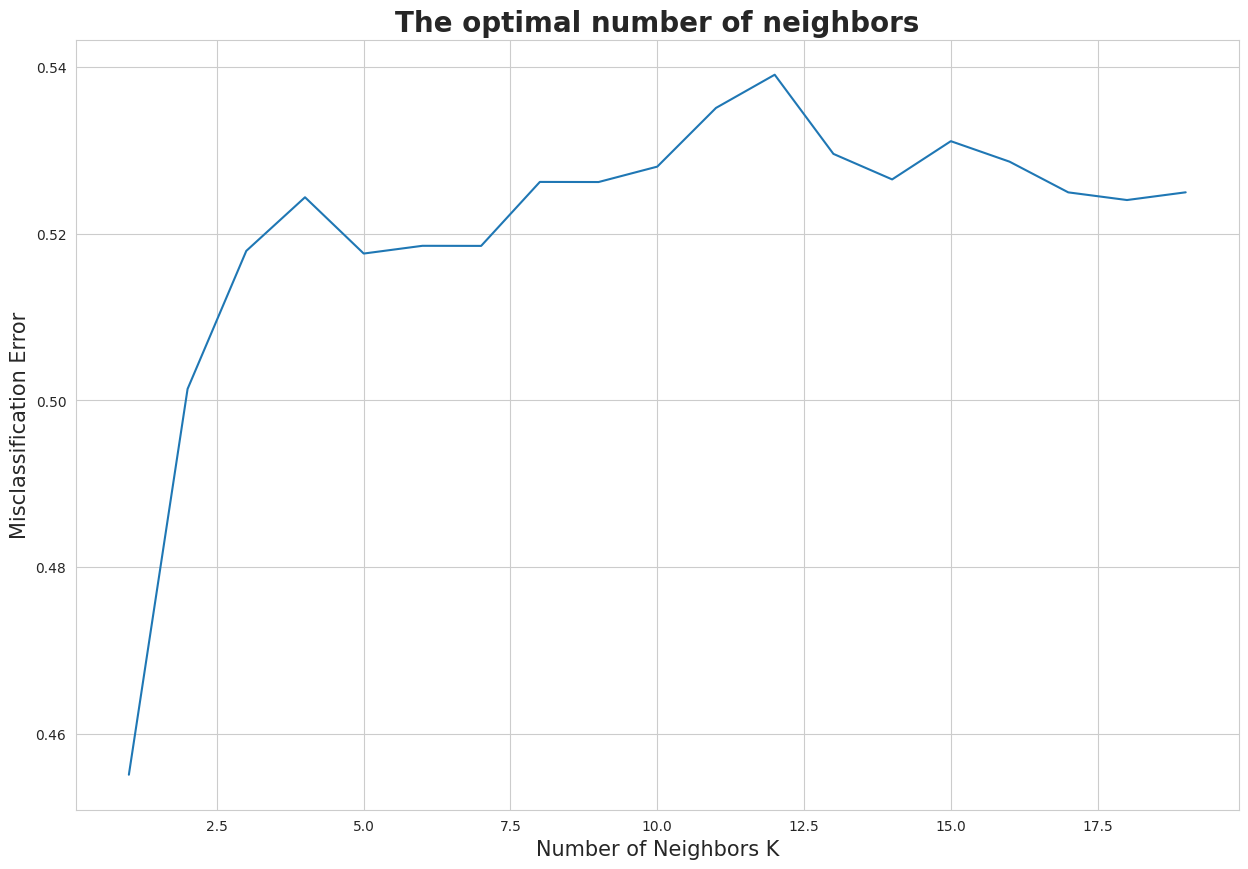

In [234]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,20))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalized, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [235]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


### DecisionTreeClassifier

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Create a Decision Tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameters grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train_normalized, Y_train)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test_normalized, Y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.33251684017146355


In [238]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_normalized_resampled, Y_train_resampled)

y_pred = decision_tree.predict(X_test_normalized_resampled)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the Decision Tree classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Decision Tree classifier is equal 28.84 %.


In [239]:
accuracy_list = cross_val_score(decision_tree, X_train_normalized_resampled, Y_train_resampled, cv=10)
print(f'The average accuracy is {(np.mean(accuracy_list)*100).round(2)}%')

The average accuracy is 64.21%


In [240]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_normalized, Y_train)

y_pred = decision_tree.predict(X_test_normalized)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the Decision Tree classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Decision Tree classifier is equal 33.37 %.


In [241]:
accuracy_list = cross_val_score(decision_tree, X_train_normalized, Y_train, cv=10)
print(f'The average accuracy is {(np.mean(accuracy_list)*100).round(2)}%')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


The average accuracy is 55.41%


In [242]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of the Decision Tree classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Decision Tree classifier is equal 32.95 %.


In [244]:
accuracy_list = cross_val_score(decision_tree, X_train, Y_train, cv=10)
print(f'The average accuracy is {(np.mean(accuracy_list)*100).round(2)}%')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


The average accuracy is 56.48%


### Logistic Regression Model

In [245]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_normalized_resampled, Y_train_resampled)

# Predict on the test data
y_pred = logreg.predict(X_test_normalized_resampled)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.32761788120024493


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [246]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_normalized, Y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_normalized)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.4280465401102266


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [247]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, Y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.40967544396815675


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
# df1 = pd.read_csv('239321L_lab1_train.csv')
# df2 = pd.read_csv('239321L_lab1_test.csv')
# df3 = pd.read_csv('expected.csv')
X_train.to_csv('/content/drive/MyDrive/ColabNotebooks/UoM_ML/Lab01/239321L_lab1_train.csv')
X_test.to_csv('/content/drive/MyDrive/ColabNotebooks/UoM_ML/Lab01/239321L_lab1_test.csv')
